# Sampling and statistics: Introduction

## Key concepts
* types of data
* types of error
* mean
* variance
* normal distribution 
* skewed distribution
* standard deviation
* standard error

## Focus questions

* What is the difference between accuracy and precision? 
* What are sources of error in the data you work with?
* What is the difference between the standard deviation and standard error?

## Types of Data 
* __Discrete__ - represented by an integer (whole number)- counts, presence/absence <br>
* __Continuous__ - represented by real<sup>1</sup> numbers (e.g. temperature, wave speed, length of an organism, concentration)  <br>
* __Categorical__ - examples: species, sediment type, hair color, site # <br>
* __Metadata__ - "data describing data"

<sup>1</sup> *Actually, vectors can be represented as complex numbers with an imaginary part*

## Types of Measurements
__Nominal__ - categories of equal rank<br>
* Species Description (phytoplankton types: diatoms, coccolithophores, etc.) 


__Ordinal__ - Categories have a logically defined rank. Steps arent equal in size or quantifiable

* How sediment grains are categorized: angularity and sphericity
* Hurricane scale: ranking is not equivalent to strength
* Beaufort Wind Scale: Mariner estimate of wind from wave climate, logically defined, but not quantifiable

__Scale__: __interval__ and __ratio__
	
* __interval scale__: constant succesive intervals, but the reference point is arbitrary e.g. temperature scale 
* __ratio scale__: natural zero point (ex: length, mass)

## Types of Error
* __Systematic error__  - systematically repeatable biased, i.e. some pattern in how they vary <br>
* __Random error__ - Impercise, but unbiased. Noise.

![error](images/error_type.png)

__Measurement precision__<br>
You would not record a value from a ruler to 3.7567453 cm if your ruler only has mm hash marks

Rounding introduces error into your calculations, so in general it is better to use all of the digits that you have and round off to the significant digit when reporting the value

__Drift__ - a systematic error that changes over time

![Nitrate Profile](images/nitrate_profile_smooth.png)

Johnson, K. S., and L. J. Coletti, 2002: In situ ultraviolet spectrophotometry for high resolution and long-term monitoring of nitrate, bromide and bisulfide in the ocean. _Deep Sea Res. Part I Oceanogr. Res. Pap._, 49, 1291–1305, doi:10.1016/S0967-0637(02)00020-1.

Bottle data (squares): chemically derived values of nitrate (low resolution, high precision)<br>
ISUS Nitrate Sensor (High resolution, systematic error (underreported values compared to bottle casts) , instrument noise (small scale random error))

Smoothing reduces noise, but there is a trade-off: lowers resolution<br>
In this example, the bias is reduced by correcting for the temperature dependence of the sensor.

## Sample distributions, probability density 

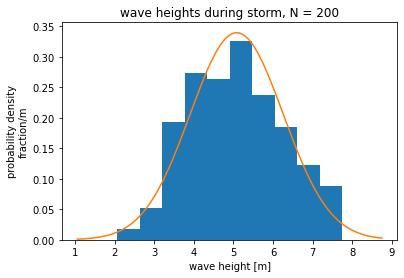

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
N=200
data = np.random.normal(5,scale=1.15,size=N)

x = np.linspace(min(data)-1, max(data)+1, 1000)

plt.hist(data,bins=10,density=True)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)))
plt.title('wave heights during storm, N = 200')
plt.xlabel('wave height [m]')
plt.ylabel('probability density\nfraction/m')
xl = plt.xlim()

Bars: Example distribution of wave heights during an extreme wave event (N = 200). Synthetic (computer-generated) data based on a similar data set in Emery and Thomson, Section 3.8.4. The sample mean $\bar{x}$ is 5.08 m and the sample standard deviation $s$ is 1.18 m.

Wave height categories are divided in to bins of with $\Delta x$

Probability density = fraction/$\Delta x$ <br>

Orange line: Normal distribution (hypothetical), allows the use of mathematical theories to use statistics. The shape of the normal distribution is defined by two parameters - the mean and standard deviation. This theoretical curve has the same mean and standard deviation as the sample distribution.  <br>

Integral of area under the curve = 1 (all probability falls under the curve) for both the sample distribution and the theoretical normal distribution.

### Cumulative distribution

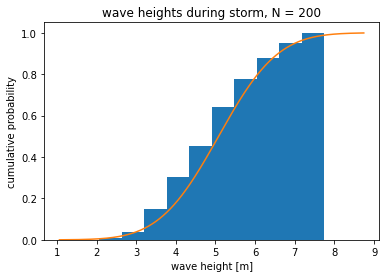

In [17]:
plt.hist(data,bins=10,density=True,cumulative=True)
plt.plot(x, np.diff(x)[0]*np.cumsum(stats.norm.pdf(x, np.mean(data), np.std(data))))
plt.title('wave heights during storm, N = 200')
plt.xlabel('wave height [m]')
plt.ylabel('cumulative probability');

Same samples and theoretical probability, expressed as cumulative probability. This is the probability that the data fall with a given interval or less.

## Descriptive statistics

### Mean 

With a finite number of $N$ samples, the __true mean__ of a population, $\mu$ ("mu"), can be _estimated_ by the sample mean $\bar{x}$,

$$ \bar{x} = \frac{1}{N}\sum_{i=1}^{N}{x_i} = \frac{1}{N}(x_1+x_2+x_3+....+x_N) $$


### Variance
__Variance__ describes the spread of the data. The sample variance is equal to the sample __standard deviation__ squared ($s^2$). The sample variance is an estimate of the true variance ($\sigma^2$)

$$s^2 = \frac{1}{N-1}\sum_{i=1}^N(x_i-\bar{x})^2,$$

where $N-1$ is the __degrees of freedom__. Degrees of freedom are the number of independent pieces of information. The variance of one sample ($N=1$) is essentially meaningless because it is always equal to zero, no matter what the value of the sample is. In this case, there are no degrees of freedom. Calculating the variance/standard deviation with $N-1$ in the denominator is called the __unbiased__ estimate of the true standard deviation $\sigma$.

The variance is __positive definite__ because it is the sum of squared values and therefore cannot be negative.

### Standard Error 

The __standard error__ describes how well the sample mean describes the true mean

$$ SE = \frac{s}{\sqrt{N}}. $$

The standard error does not describe the spread of the data, it describes the how well the sample mean, $\bar{x}$, represents the true mean, $\mu$. The standard error can thought of as an estimate of the standard deviation of $(\bar{x} - \mu)$, after many repeated experiments with $N$ samples. 

#### Example revisited: repreated trials

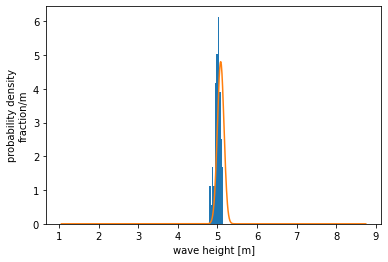

In [18]:
Nsub = 10
xm = np.nan*np.ones(100)

for i in range(100):
    xm[i] = np.mean(np.random.normal(5,scale=1.15,size=N))

plt.figure()
plt.hist(xm,density=True)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)/np.sqrt(N)))
plt.xlim(xl)
plt.xlabel('wave height [m]')
plt.ylabel('probability density\nfraction/m');

Results from 100 repeated trials during same storm (N = 200 each trial). The $x$-axis is the same as that shown for the sample distribution above, to emphasize how the distribution of means clusters more tightly together. We can think of these repeated trials as different instruments measuring different waves in the same storm. Note that this is easy to do with a computer-generated example dataset, but not so easy to do in practices.

Blue bars:
Probability density of the mean of each trial (mean of all sample means = 4.99m)

Orange curve: 
Normal distribution
Mean = Mean of trial 1 (example distribution shown above).
Standard deviation = Standard error of trial 1, SE = $s/\sqrt{N}$

The standard error from 1 set of samples, gives an estimate of standard deviation (spread) of the means.

## Further Reading

Glover, Jenkins and Doney – Modeling Methods (GJD)

* Sections 2.1-2 - Measurement Theory

Statistical Thinking for the 21st Century (ST21): 

* Chapter 1: Introduction
* Chapter 2: Working with data
* Chapter 4: Summarizing data